Riding the Wave

Convection Problems

This module will explore the convection equation in more depth!



Conservation Laws

Conservation of Mass:

Rate of change of mass in the CV + rate of cahnge of mass across CS = 0

COM:

$$\frac{\partial}{\partial t} \int_{cv} \rho dV + \int_{cs} \rho u dA =0$$

Since CV is small we can take $\rho$ as uniform quantity inside it. 

$$\frac{\partial}{\partial t} \int_{cv} \rho dV \rightarrow \frac{\partial \rho}{\partial t}dAdx$$

Total flux of mass across the CS

$$\int_{cs} pudA \rightarrow \frac{\partial}{\partial x}(pu)dAdx$$

$$\frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}(pu) = 0$$

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('35unQgSaT88')


General Conservation Laws

A general conservation law for quantity e is:

$$\frac{\partial}{\partial t} \int_{cv} edV + \oint_{cs} \vec{F} \cdot d\vec{A} = 0$$

Apply theorem of Gauss to the second integral

Recall nonlinear convection was:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x}= 0$$

We can rewrite this as:

$$\frac{\partial u}{\partial t} + \frac{\partial }{\partial x} \left( \frac{u^2}{2} \right ) = 0$$

which is the conservative form of the nonlinear convection equation:

$$F = \frac{u^2}{2}$$





Traffic Flow Model

Consider the linear function:

$$u(\rho) = u_{max} \left(1-\frac{\rho}{\rho_{max}}\right)$$

Experimental Observations:

1) All drivers will approach a max velocity $u_max$ when the road is empty
2) If the road is completely jampacked ($\rho \rightarrow \rho_{max}$$), velocity goes to zero

apply conservation law to traffic density $\rho$

$$\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0$$

Where F is traffic flux

$$F = \rho u_{max} \left(1-\frac{\rho}{\rho_{max}}\right)$$

Green Light!

Lets say we are examining a road of length 4 where speed limit is $u_{max} = 1$, fitting 10 cars per unit length ($\rho_{max} =10$). We have intersection with a red light at x=2. At light traffic is bumper to bumper and density decreases linearly to zero as we approach beginning of our road, ahead of light road is clear. Mathematically represent this:

\begin{equation}\rho(x,0) = \left\{ \begin{array}{cc}
\rho_{\rm max}\frac{x}{2} & 0 \leq x < 2  \\
0 & 2 \leq x \leq 4 \\ \end{array} \right.\end{equation}



In [2]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16


In [5]:
def rho_green_light(nx, rho_light):
    
    """Computes green light inital condition with shock, and linear distribution behind"""
    
    
    rho = numpy.arange(nx)*2./nx*rho_light #before stoplight
    rho[(nx-1)/2:] = 0
    return rho

    

In [9]:
#Basic inital condition params
nx = 81
nt = 30
dx = 4.0/(nx-1)

x = numpy.linspace(0,4,nx)

rho_max = 10.
u_max=1.
rho_light = 10.

rho = rho_green_light(nx,rho_light)


//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


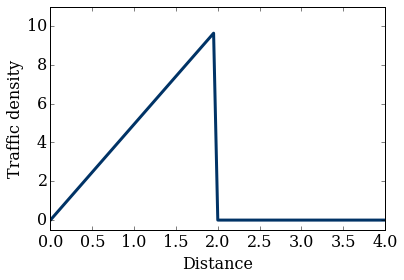

In [10]:
pyplot.plot(x,rho,color='#003366', ls='-', lw=3)
pyplot.ylabel('Traffic density')
pyplot.xlabel('Distance')
pyplot.ylim(-0.5,11.);

In [12]:
#Analyze how traffic behaves once the light turns green
def computeF(u_max, rho_max, rho):
    """Compute flux"""
    return u_max*rho*(1-rho/rho_max)

Forward time backward space

Discretization:

$$\frac{\rho_i^{n+1} - \rho_i^n}{\Delta t} + \frac{F_i^n - F_{i-1}^n}{\Delta x} = 0$$

In [13]:
def ftbs(rho, nt,dt,dx,rho_max, u_max):
    """Computes solution with forward time backward space"""
    rho_n = numpy.zeros((nt,len(rho)))
    rho_n[0,:] = rho.copy()
    
    for t in range(1,nt):
        F = computeF(u_max, rho_max,rho)
        rho_n[t,1:] = rho[1:]-dt/dx*(F[1:]-F[:-1])
        rho_n[t,0]=rho[0]
        rho=rho_n[t].copy()
        
    return rho_n


In [14]:
sigma = 1.
dt = sigma*dx
rho_n = ftbs(rho,nt,dt,dx,rho_max,u_max)

In [15]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

ImportError: No module named 'JSAnimation'

NameError: name 'display_animation' is not defined

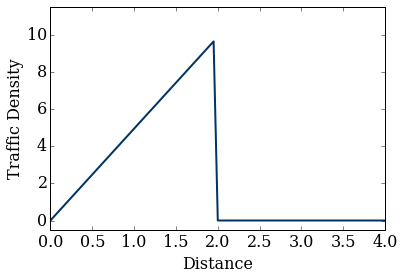

In [16]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4), ylim=(-.5,11.5),xlabel=('Distance') , ylabel=('Traffic Density'));
line,=ax.plot([],[], color='#003366',lw=2);

def animate(data):
    x = numpy.linspace(0,4,nx)
    y=data
    line.set_data(x,y)
    return line,

anim=animation.FuncAnimation(fig,animate,frames=rho_n, interval=50)
display_animation(anim,default_mode='once')

The solution is blowing up!

Let's take a closer look!

$$\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0$$

Chain rule:

$$\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial \rho} \frac{\partial\rho}{\partial x} = 0$$

So this is a wave equation where wave speed $u_{wave}=\frac{\partial F}{\partial \rho}$

$$u_{wave} = \frac{\partial F}{\partial\rho} = u_{max} \left( 1-2\frac{\rho}{\rho_{max}} \right)$$

See how wave speed changes sign at $\rho = \rho_{max} / 2$?


Upwind scheme- discretization scheme that is biased in the direction that information propogates


So we wil try using an inital condition that will not produce negative speed

We will try with:

\begin{equation}\rho(x,0) = \left\{ \begin{array}{cc}
2.5x & 0 \leq x < 2  \\
0 & 2 \leq x \leq 4 \\ \end{array} \right.\end{equation}



In [23]:
rho_light = 5.
nt = 40
rho = rho_green_light(nx, rho_light)
rho_n = ftbs(rho, nt, dt,dx, rho_max, u_max)

anim=animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim,default_mode='once')

//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


NameError: name 'display_animation' is not defined

Beware the CFL

$$\sigma = c\frac{\Delta t}{\Delta x} < 1$$

So if we generalise the CFL condition

$$\sigma = max \left[ |u_{wave}| \frac{\Delta t}{\Delta x} \right] < 1$$

which in our case is:

$$\sigma = max \left[ u_{max} \left| 1 - \frac{\rho}{\rho_{max}} \right| \frac{\Delta t}{\Delta x} \right] < 1$$



In [24]:
rho_light = 4.
u_max = 1.1
nt = 40
rho = rho_green_light(nx,rho_light)
rho_n = ftbs(rho, nt,dt,dx,rho_max,u_max)

anim=animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim,default_mode='once')



//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


NameError: name 'display_animation' is not defined